# Oppgave 1

In [2]:
from scipy import ndimage
from skimage import io,util,color
from IPython import display
import cmath
import numpy

from scipy import fftpack

%matplotlib inline

Kode for DFT og IDFT. 
Lagde en generell FT funksjon som kunne benyttes i begge funksjonene, som tar imot om den skal bruke j eller -j i formelen:
    

In [1]:
%%latex

\[ \sum_{u=0}^{M-1} \sum_{v=0}^{N-1} f(x,y)e^{j2\pi(\frac{ux}{M}+\frac{vy}{N})} \]

<IPython.core.display.Latex object>

In [3]:
def FT(im,u,v,imaginary):
    s = complex(0,0)
    
    M,N = im.shape
    
    for x in range(M):
        for y in range(N):
            s += im[x,y] * cmath.exp(imaginary * 2 * cmath.pi * (((u*x) / M) + ((v*y) / N)))
    return s


def DFT(im):
    height, width = im.shape
    
    out = numpy.zeros(im.shape,dtype=numpy.complex)
    
    for u in range(height):
        for v in range(width):
            out[u,v] = FT(im,u,v,-1j)
    
    return out

def IDFT(im):
    height, width = im.shape
    
    out = numpy.zeros(im.shape,dtype=numpy.complex)
    
    for u in range(height):
        for v in range(width):
            out[u,v] = (1/(height*width)) * FT(im,u,v,1j)
    
    return out

Under er koden fra lars vidar modifisert til å teste min implementasjon av funksjonene

C:\Users\Jim-Alexander\Anaconda3\lib\site-packages\scipy\fftpack\basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


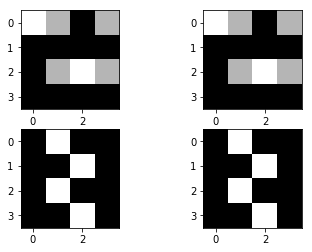

In [4]:
# Read image, convert to gray, convert to float
im = numpy.asarray([[0, 1, 0, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0, 0, 1, 0]], dtype=numpy.float)

# Retrieve the image dimensions
height,width = im.shape

# Perform the fourier transformation
ft_builtin = fftpack.fft2(im)
ft = DFT(im)

# Get the fourier spectrum by finding the length of the complex number vectors
ft_abs = numpy.absolute(ft)
ft_builtin_abs = numpy.absolute(ft_builtin)

#transformerer med invers fourier
transformed_back_builtin = numpy.real(fftpack.ifft2(ft_builtin))
transformed_back = numpy.real(IDFT(ft))


# Show the result
io.imshow_collection([ft_abs,ft_builtin_abs, transformed_back,transformed_back_builtin], cmap='gray')
io.show()


Som vi kan se fra eksemplet over fungerer min implementasjon av DFT og IDFT. 
På venstre siden er min implementasjon, mens på høyre side er de innebygde funksjonene i fftpack.
På øverse rad er frekvensdomenet, underste rad er transformert tilbake fra frekvensdomenet.